In [17]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [204]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.utils import plot_model

**Load The Dataset from the ucimlrepo**

In [205]:
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 
  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

**Preprocess The data reshaping and normalizing**

In [206]:
# Data Preparation
def preprocess_data(X):
    # Reshape data to be compatible with CNN
    # Convert DataFrame to numpy array
    X_array = X.to_numpy()
    X_reshaped = X_array.reshape((X.shape[0], 8, 8, 1))
    # Normalize pixel values to be between 0 and 1
    X_normalized = X_reshaped / 16.0
    return X_normalized

**Building the CNN Model**

In [207]:
def create_model():
    # Create a sequential model
    model = models.Sequential()
    
    # Convolutional layers
    # Add the first convolutional layer with 32 filters, each of size 3x3,
    # ReLU activation, and same padding to preserve input dimensions
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'))
    # Add a max pooling layer to down-sample the feature maps by taking
    # the maximum value over a 2x2 window
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add the second convolutional layer with 64 filters, each of size 3x3,
    # ReLU activation, and same padding
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    # Another max pooling layer for further down-sampling
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Add the third convolutional layer with 64 filters, each of size 3x3,
    # ReLU activation, and same padding
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    
    # Fully connected layers
    # Flatten the 3D feature maps to a 1D vector to feed into the fully connected layers
    model.add(layers.Flatten())
    # Add a fully connected layer with 64 neurons and ReLU activation
    model.add(layers.Dense(64, activation='relu'))
    # Add an output layer with 10 neurons (for 10 classes) and softmax activation
    # to output probabilities for each class
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

**Training and Evaluation of The Model**

In [208]:
# Training and Evaluation
def train_and_evaluate_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_losses = []
    fold_confusion_matrices = []

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        print(f"Fold {i+1}/{kf.get_n_splits()}")

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Resetting the index of y

        #Compiling the mode using adam optimizer
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        #Training the model
        history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

        fold_accuracies.append(history.history['val_accuracy'])
        fold_losses.append(history.history['val_loss'])

        # Confusion matrix
        y_pred = np.argmax(model.predict(X_test), axis=-1)
        cm = confusion_matrix(y_test, y_pred)
        fold_confusion_matrices.append(cm)

    return fold_losses,fold_accuracies,fold_confusion_matrices

**Plot Loss Curves**

In [209]:
def plot_loss_curves(losses):
    plt.figure(figsize=(8, 6))
    for i, loss in enumerate(losses):
        plt.plot(loss, label=f'Fold {i+1}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

**Plot the Accuracy Curves**

In [210]:
def plot_accuracy_curves(accuracies):
    plt.figure(figsize=(8, 6))
    for i, acc in enumerate(accuracies):
        plt.plot(acc, label=f'Fold {i+1}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

**Plot the Confusion Matrix**

In [211]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [212]:
# Preprocess data
X_normalized = preprocess_data(X)
# Create CNN model
print(X_normalized.shape)

(5620, 8, 8, 1)


In [213]:
# Create CNN model
cnn_model = create_model()
cnn_model.summary()

C:\Users\nmkva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 8, 8, 32)       │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,842 (284.54 KB)

 Trainable params: 72,842 (284.54 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
# Train and evaluate the model
fold_losses,fold_accuracies,fold_confusion_matrices = train_and_evaluate_model(cnn_model, X_normalized, y)

Fold 1/5
Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4720 - loss: 1.6700 - val_accuracy: 0.9155 - val_loss: 0.2658
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9403 - loss: 0.1945 - val_accuracy: 0.9617 - val_loss: 0.1332
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9703 - loss: 0.1040 - val_accuracy: 0.9689 - val_loss: 0.1068
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9762 - loss: 0.0768 - val_accuracy: 0.9804 - val_loss: 0.0713
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9842 - loss: 0.0546 - val_accuracy: 0.9778 - val_loss: 0.0663
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Fold 2/5
Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9808 - loss: 0.0529 - val_accuracy: 0.9813 - val_loss: 0.0596
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9865 - loss: 0.0407 - val_accuracy: 0.9893 - val_loss: 0.0428
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - 

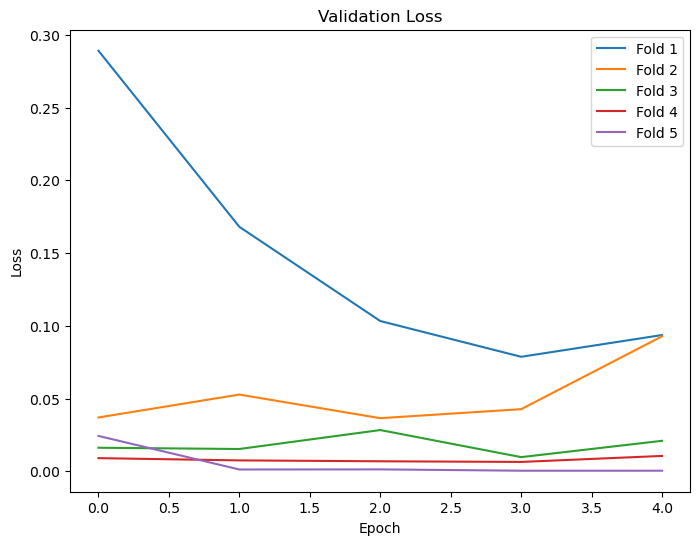

In [157]:
 # Plotting loss curves
plot_loss_curves(fold_losses)

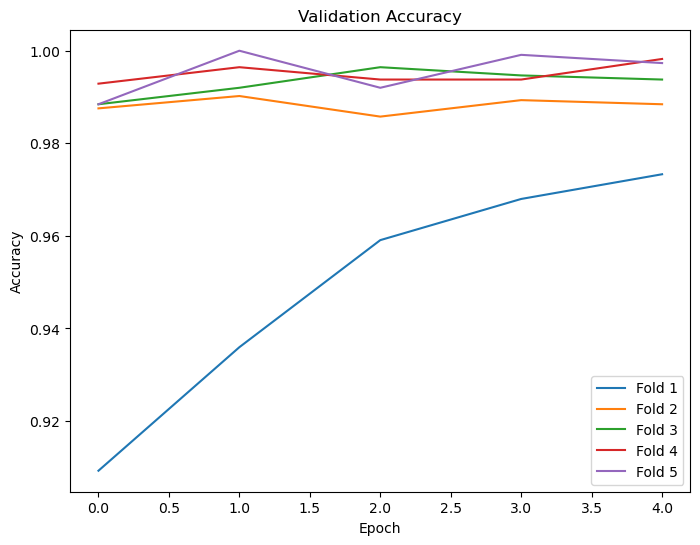

In [133]:
# Plotting accuracy curves
plot_accuracy_curves(fold_accuracies)

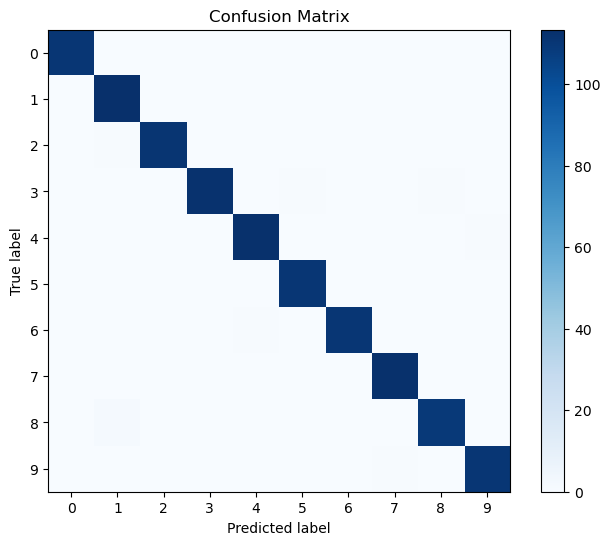

In [134]:
# Average confusion matrix
average_cm = np.mean(fold_confusion_matrices, axis=0)
plot_confusion_matrix(average_cm)